# The dataset

Dataset yang digunakan merupakan data book-crossing yang terdiri dari tiga file dalam ekstensi CSV yaitu:
1. BX-Users.csv
2. BX-Books.csv
3. BX-Book-Ratings.csv

In [1]:
#Loading neccesary packages
import numpy as np          # linear algebra
import pandas as pd         # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

#Load dataset from bookcrossing
users = pd.read_csv("./BX/BX-Users.csv", names=['User-ID', 'Location', 'Age'], encoding='latin-1', skiprows=1)
books = pd.read_csv("./BX/BX-Books.csv", names=['ISBN', 'Book-Title' ,'Book-Author','Year-Of-Publication', 'Publisher', 'Image-Url-S', 'Image-Url-M', 'Image-Url-L'], encoding='latin-1', skiprows=1)
ratings = pd.read_csv("./BX/BX-Book-Ratings.csv", names=['User-ID', 'ISBN', 'Book-Rating'], encoding='latin-1', skiprows=1)

In [2]:
#Print users header
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
#Print books header
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
#Print ratings header
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [5]:
#Print books info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-Url-S          271379 non-null  object
 6   Image-Url-M          271379 non-null  object
 7   Image-Url-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [6]:
#Print users info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [7]:
#Print ratings info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Data Preprocessing

In [8]:
data = pd.merge(ratings, users, on='User-ID', how='inner')

In [9]:
data = pd.merge(data, books, on='ISBN', how='inner')

In [10]:
data.columns


Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-Url-S',
       'Image-Url-M', 'Image-Url-L'],
      dtype='object')

In [11]:
print("Dataset memiliki {} rows dan {} columns".format(data.shape[0], data.shape[1]))

Dataset memiliki 179102 rows dan 12 columns


In [12]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


Data Cleaning

In [13]:
#delete features that are not needed in books data
data.drop(['Image-Url-S','Image-Url-M','Image-Url-L', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Location'],axis=1,inplace=True)

In [14]:
data.head()

,User-ID,ISBN,Book-Rating,Age,Book-Title
0,276725,034545104X,0,NaN,Flesh Tones: A Novel
1,2313,034545104X,5,23.0,Flesh Tones: A Novel
2,6543,034545104X,0,34.0,Flesh Tones: A Novel
3,8680,034545104X,5,2.0,Flesh Tones: A Novel
4,10314,034545104X,9,NaN,Flesh Tones: A Novel


In [15]:
#update all capital alphabet in dataset to lowercase and replace - with _ 
data.columns= data.columns.str.lower().str.replace('-', '_')

## Checking missing value in dataset

In [16]:
#check null value of feature book_author in books data
data.loc[(data['age'].isnull()),:]

,user_id,isbn,book_rating,age,book_title
0,276725,034545104X,0,NaN,Flesh Tones: A Novel
4,10314,034545104X,9,NaN,Flesh Tones: A Novel
6,28266,034545104X,0,NaN,Flesh Tones: A Novel
8,39002,034545104X,0,NaN,Flesh Tones: A Novel
9,50403,034545104X,9,NaN,Flesh Tones: A Novel
...,...,...,...,...,...
179094,250739,8845221806,0,NaN,Il comunista che mangiava i bambini ([Romanzo ...
179095,250739,8845224120,0,NaN,"Io E Lui (Fiction, Poetry and Drama)"
179096,250739,8874960018,0,NaN,L'Occhio Nero Al Panda Gliel'ho Fatto IO
179100,250764,002736660X,0,NaN,Branigan's Dog


In [17]:
#fill the missing value
data.loc[(data['book_title'].isnull()),:] = 'no mention'
#check null value of feature publisher in books data 
print(data['book_title'].isnull().sum())

0


In [18]:
#fill the missing value
data.loc[(data['isbn'].isnull()),:] = 'no mention'
#check null value of feature publisher in books data 
print(data['isbn'].isnull().sum())

0


In [19]:
jumlah = data.isnull().sum().sort_values(ascending=False)
persentase = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
#check missing value in users
missing_data = pd.concat([jumlah, persentase], axis=1, keys=['Jumlah', 'Pesentase Missing Data'])
missing_data['Pesentase Missing Data'] = missing_data['Pesentase Missing Data'].apply(lambda x: x * 100)

In [20]:
#check missing value in users based on Presentase missing data
missing_data.loc[missing_data['Pesentase Missing Data'] > 10]

,Jumlah,Pesentase Missing Data
age,44773,24.998604


In [21]:
#print sum of missing value in users data
print('Data yang hilang atau missing data')
round(data.isnull().sum() / len(data) * 100, 4)

Data yang hilang atau missing data


user_id         0.0000
isbn            0.0000
book_rating     0.0000
age            24.9986
book_title      0.0000
dtype: float64

In [22]:
#check mean of book_rating in books data
print('Rata-rata rating buku: ', round(data['book_rating'].mean()))

Rata-rata rating buku:  3


In [23]:
#check mean of book_rating in books data
print('Rata-rata rating buku: ', round(data['book_rating'].mean(), 5))

Rata-rata rating buku:  3.12777


# Replace NaN value in dataset

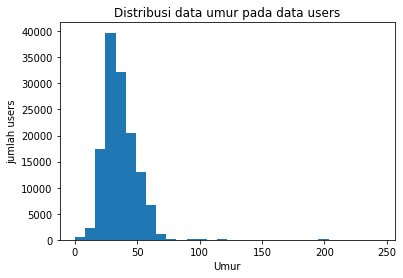

In [24]:
data.age.plot.hist(bins=30)
plt.title("Distribusi data umur pada data users")
plt.ylabel('jumlah users')
plt.xlabel('Umur');

In [25]:
#check how many rows and attributes of users data
data.shape

(179102, 5)

In [26]:
#check unique value of userid in users dataset
data['user_id'].unique()

array([276725, 2313, 6543, ..., 250692, 250707, 250734], dtype=object)

In [27]:
#check unique value of age in users dataset
data['age'].unique()

array([nan, 23.0, 34.0, 2.0, 45.0, 24.0, 36.0, 35.0, 51.0, 39.0, 52.0,
       72.0, 30.0, 46.0, 41.0, 33.0, 29.0, 21.0, 38.0, 63.0, 26.0, 59.0,
       44.0, 1.0, 16.0, 37.0, 32.0, 201.0, 56.0, 31.0, 54.0, 27.0, 49.0,
       50.0, 47.0, 40.0, 60.0, 69.0, 43.0, 42.0, 25.0, 22.0, 19.0, 18.0,
       64.0, 58.0, 68.0, 61.0, 67.0, 28.0, 209.0, 55.0, 71.0, 48.0, 57.0,
       62.0, 53.0, 13.0, 17.0, 15.0, 66.0, 14.0, 20.0, 75.0, 116.0, 11.0,
       92.0, 0.0, 80.0, 10.0, 9.0, 82.0, 12.0, 8.0, 152.0, 3.0, 104.0,
       65.0, 103.0, 70.0, 73.0, 7.0, 128.0, 78.0, 101.0, 76.0, 228.0,
       79.0, 83.0, 239.0, 77.0, 99.0, 84.0, 204.0, 98.0, 74.0, 93.0, 81.0,
       151.0, 100.0, 136.0, 97.0, 5.0, 157.0, 133.0, 90.0, 96.0, 4.0,
       146.0, 148.0, 168.0, 124.0, 141.0, 244.0, 105.0, 199.0, 220.0,
       85.0, 95.0, 108.0, 132.0, 6.0, 89.0, 223.0], dtype=object)

In [28]:
#check unique value of age in users dataset
data['book_rating'].unique()

array([0, 5, 9, 8, 6, 7, 4, 10, 3, 1, 2], dtype=object)

In [29]:
#check unique value of age in users dataset
data['book_title'].unique()

array(['Flesh Tones: A Novel', 'Help!: Level 1',
       'Les Particules Elementaires', ...,
       'Latticework: The New Investing', "Branigan's Dog",
       'Glamorous Movie Stars of the Thirties: Paper Dolls'], dtype=object)

In [30]:
#declare age = age value in users data
age = data['age']
#declare mean_age = mean of age in users data
mean_age = age.mean()

In [31]:
#print mean of age in users data
mean_age

36.23493065533131

In [32]:
#redeclare mean_age = round value mean of age in users data
mean_age = round(mean_age)

In [33]:
#fill missing value of age in users data with mean_age
age.fillna(value = mean_age, inplace = True)

In [35]:
#recheck missing value in users
jumlah = data.isnull().sum().sort_values(ascending=False)
persentase = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([jumlah, persentase], axis=1, keys=['Jumlah', 'Pesentase Missing Data'])
missing_data['Pesentase Missing Data'] = missing_data['Pesentase Missing Data'].apply(lambda x: x * 100)

In [36]:
#replace age >90 and age<5 in users data with nan 
data.loc[(data['age'] > 90) | (data['age'] < 5)] = np.nan
#fill nan value with mean of age
data['age'].fillna((data['age'].mean()), inplace=True)
data['age']= data['age'].astype('int64')
#Binning users into age groups using pandas.cut
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data.age, range(0, 81, 10), right=False, labels=labels)
data[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,36,30-39
1,23,20-29
2,34,30-39
3,35,30-39
5,45,40-49
7,24,20-29
14,51,50-59
17,39,30-39
18,52,50-59
19,72,70-79


In [37]:
data['age_group'].unique()

['30-39', '20-29', '40-49', '50-59', '70-79', '60-69', '10-19', NaN, '0-9']
Categories (8, object): ['0-9' < '10-19' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

In [38]:
#check unique value of age in users dataset
data['age'].unique()

array([36, 23, 34, 35, 45, 24, 51, 39, 52, 72, 30, 46, 41, 33, 29, 21, 38,
       63, 26, 59, 44, 16, 37, 32, 56, 31, 54, 27, 49, 50, 47, 40, 60, 69,
       43, 42, 25, 22, 19, 18, 64, 58, 68, 61, 67, 28, 55, 71, 48, 57, 62,
       53, 13, 17, 15, 66, 14, 20, 75, 11, 80, 10,  9, 82, 12,  8, 65, 70,
       73,  7, 78, 76, 79, 83, 77, 84, 74, 81,  5, 90, 85,  6, 89],
      dtype=int64)

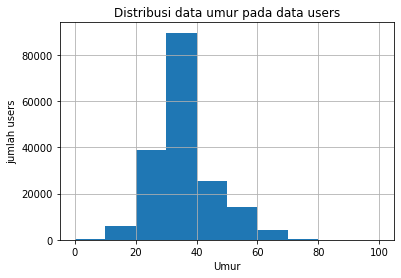

In [39]:
#create plot of age distribution
data.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Distribusi data umur pada data users')
plt.xlabel('Umur')
plt.ylabel('jumlah users')
plt.savefig('age_dist.png', bbox_inches='tight')
plt.show()

In [40]:
#check outliers of age value in users data
print('Jumlah outliers: ', sum(data['age'] > 100))

Jumlah outliers:  0


In [41]:
#check unique value of userid in users data
print('Jumlah pengguna: ',data['user_id'].nunique())

Jumlah pengguna:  34623


In [42]:
#check unique value of isbn in books data
print('Jumlah buku: ', data['isbn'].nunique())

Jumlah buku:  67134


In [43]:
#select data ISBN in books and merge with ratings
data = data[data.isbn.isin(data.isbn)]

In [45]:
#print value in unique_ratings data
data.tail()

,user_id,isbn,book_rating,age,book_title,age_group
179097,250750,1552790207,8,44,The Black Pope,40-49
179098,250750,1567920950,0,44,Reading in Bed: Personal Essays on the Glories...,40-49
179099,250750,1587990008,0,44,Latticework: The New Investing,40-49
179100,250764,002736660X,0,36,Branigan's Dog,30-39
179101,250764,048623715X,0,36,Glamorous Movie Stars of the Thirties: Paper D...,30-39


## Feature Engineering

In [46]:
#define favorable book in term of book with rating>5
data["Favorable"] = data["book_rating"] > 5

In [47]:
data.tail()

,user_id,isbn,book_rating,age,book_title,age_group,Favorable
179097,250750,1552790207,8,44,The Black Pope,40-49,True
179098,250750,1567920950,0,44,Reading in Bed: Personal Essays on the Glories...,40-49,False
179099,250750,1587990008,0,44,Latticework: The New Investing,40-49,False
179100,250764,002736660X,0,36,Branigan's Dog,30-39,False
179101,250764,048623715X,0,36,Glamorous Movie Stars of the Thirties: Paper D...,30-39,False


In [48]:
#check dataframe of new_book_df
data[1:15]

,user_id,isbn,book_rating,age,book_title,age_group,Favorable
1,2313,034545104X,5,23,Flesh Tones: A Novel,20-29,False
2,6543,034545104X,0,34,Flesh Tones: A Novel,30-39,False
3,NaN,NaN,NaN,35,NaN,30-39,False
4,10314,034545104X,9,36,Flesh Tones: A Novel,30-39,True
5,23768,034545104X,0,45,Flesh Tones: A Novel,40-49,False
6,28266,034545104X,0,36,Flesh Tones: A Novel,30-39,False
7,28523,034545104X,0,24,Flesh Tones: A Novel,20-29,False
8,39002,034545104X,0,36,Flesh Tones: A Novel,30-39,False
9,50403,034545104X,9,36,Flesh Tones: A Novel,30-39,True
10,56157,034545104X,0,36,Flesh Tones: A Novel,30-39,False


In [49]:
#select data userid in new_book_df and get review from 200 first users
ratings = data[data['user_id'].isin(range(200))]

In [50]:
#create dataset with favorable books
favorable_ratings = ratings[data["Favorable"]]

Temukan review yang bagus dari pengguna untuk itemset. Jadi, kita membutuhkan data buku dengan review yang bagus. Hal ini dapat dilakukan dengan mengelompokkan dataset berdasarkan User ID and melakukan iterasi berdasarkan buku di setiap kelompok

In [51]:
favorable_reviews_by_users = dict((k, frozenset(v.values))
                                 for k, v in favorable_ratings.groupby("user_id")["isbn"])

In [52]:
#count sum of favorable book groupby isbn
num_favorable_by_book = data[["isbn", "age_group","Favorable"]].groupby("isbn").sum()

In [53]:
#check num_favorable_by_book value sort by Favorable
num_favorable_by_book.sort_values(by="Favorable", ascending=False).head()

,Favorable
isbn,
059035342X,273
044023722X,208
067976402X,201
043935806X,183
044021145X,173


## The Apriori Implementation/Market Basket Analysis

Langkah-langkah implementasi dari apriori pada sistem rekomendasi ini yaitu:
1. Membuat initial frequent itemset
2. Membuat candidate itemset menggunakan superset di frequent itemset yang tersedia
3. Uji candidate itemset untuk mengetahui bahwa candidat tersebut sudah frequent, Jika tidak candidat itemset akan dihapus
4. Melakukan pengecekan frequent itemset yang baru pada langkah 3
5. Mengembalikan semua frequent itemset yang telah ditemukan

In [54]:
#Define frequent_itemsets to access itemset 
frequent_itemsets = {}

In [55]:
#Define minimum support which needed for item so that an item can be considered frequency. 
#This value is selected based on the data set
min_support = 2

In [56]:
from collections import defaultdict

def find_frequent_itemsets(favorable_reviews_by_users, k_1_itemsets, min_support):
    counts = defaultdict(int)
    for user, reviews in favorable_reviews_by_users.items():
        for itemset in k_1_itemsets:
            if itemset.issubset(reviews):
                for other_reviewed_book in reviews - itemset:
                    current_superset = itemset | frozenset((other_reviewed_book,))
                    counts[current_superset] += 1
    return dict([(itemset, frequency) for itemset, frequency in counts.items() if frequency >= min_support])

In [57]:
import sys
frequent_itemsets = {}  # itemsets are sorted by length
min_support = 20
frequent_itemsets[1] = dict((frozenset((isbn,)), row["Favorable"])
                                for isbn, row in num_favorable_by_book.iterrows()
                                if row["Favorable"] > min_support)

In [58]:
frequent_itemsets[1]

{frozenset({'000649840X'}): 34,
 frozenset({'002542730X'}): 63,
 frozenset({'006000438X'}): 29,
 frozenset({'006016848X'}): 36,
 frozenset({'006019491X'}): 37,
 frozenset({'006092988X'}): 32,
 frozenset({'006098824X'}): 27,
 frozenset({'006099486X'}): 43,
 frozenset({'006101351X'}): 82,
 frozenset({'014023313X'}): 50,
 frozenset({'014025448X'}): 70,
 frozenset({'014028009X'}): 105,
 frozenset({'014029628X'}): 64,
 frozenset({'014038572X'}): 44,
 frozenset({'014100018X'}): 41,
 frozenset({'014131088X'}): 35,
 frozenset({'015100692X'}): 25,
 frozenset({'015600710X'}): 22,
 frozenset({'015602943X'}): 22,
 frozenset({'031205436X'}): 26,
 frozenset({'031242227X'}): 57,
 frozenset({'031298328X'}): 32,
 frozenset({'034536676X'}): 45,
 frozenset({'034538184X'}): 21,
 frozenset({'034538475X'}): 56,
 frozenset({'034539657X'}): 21,
 frozenset({'034540288X'}): 74,
 frozenset({'034540761X'}): 24,
 frozenset({'034541389X'}): 46,
 frozenset({'034543479X'}): 31,
 frozenset({'037541309X'}): 39,
 frozen

In [59]:
import sys
frequent_itemsets = {}  # itemsets are sorted by length
min_support = 2

# k=1 candidates are the isbn with more than min_support favourable reviews
frequent_itemsets[1] = dict((frozenset((isbn,)), row["Favorable"])
                                for isbn, row in num_favorable_by_book.iterrows()
                                if row["Favorable"] > min_support)

print("There are {} books with more than {} favorable reviews".format(len(frequent_itemsets[1]), min_support))
sys.stdout.flush()
for k in range(2, 20):
    # Generate candidates of length k, using the frequent itemsets of length k-1
    # Only store the frequent itemsets
    cur_frequent_itemsets = find_frequent_itemsets(favorable_reviews_by_users, frequent_itemsets[k-1],
                                                   min_support)
    if len(cur_frequent_itemsets) == 0:
        print("Did not find any frequent itemsets of length {}".format(k))
        sys.stdout.flush()
        break
    else:
        print("I found {} frequent itemsets of length {}".format(len(cur_frequent_itemsets), k))
        #print(cur_frequent_itemsets)
        sys.stdout.flush()
        frequent_itemsets[k] = cur_frequent_itemsets
# We aren't interested in the itemsets of length 1, so remove those
del frequent_itemsets[1]

There are 4112 books with more than 2 favorable reviews
I found 4 frequent itemsets of length 2
I found 1 frequent itemsets of length 3
Did not find any frequent itemsets of length 4


In [60]:
print("Found a total of {0} frequent itemsets".format(sum(len(itemsets) for itemsets in frequent_itemsets.values())))

Found a total of 5 frequent itemsets


## Extracting Asosiation Rules

In [61]:
candidate_rules = []
for itemset_length, itemset_counts in frequent_itemsets.items():
    for itemset in itemset_counts.keys():
        for conclusion in itemset:
            premise = itemset - set((conclusion,))
            candidate_rules.append((premise, conclusion))
            
print("There are {} candidate rules".format(len(candidate_rules)))

There are 11 candidate rules


In [62]:
print(candidate_rules[:5])

[(frozenset({'8445071408'}), '8445071769'), (frozenset({'8445071769'}), '8445071408'), (frozenset({'8445071777'}), '8445071408'), (frozenset({'8445071408'}), '8445071777'), (frozenset({'8445071777'}), '8445071769')]


In [63]:
# Now, we compute the confidence of each of these rules. This is very similar to what we did in chapter 1
correct_counts = defaultdict(int)
incorrect_counts = defaultdict(int)
for user, reviews in favorable_reviews_by_users.items():
    for candidate_rule in candidate_rules:
        premise, conclusion = candidate_rule
        if premise.issubset(reviews):
            if conclusion in reviews:
                correct_counts[candidate_rule] += 1
            else:
                incorrect_counts[candidate_rule] += 1
rule_confidence = {candidate_rule: correct_counts[candidate_rule] / float(correct_counts[candidate_rule] + incorrect_counts[candidate_rule])
              for candidate_rule in candidate_rules}

In [64]:
# Choose only rules above a minimum confidence level
min_confidence = 0.9

In [65]:
# Filter out the rules with poor confidence
rule_confidence = {rule: confidence for rule, confidence in rule_confidence.items() if confidence > min_confidence}
print(len(rule_confidence))

11


In [66]:
from operator import itemgetter
sorted_confidence = sorted(rule_confidence.items(), key=itemgetter(1), reverse=True)

In [67]:
for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    print("Rule: Jika seorang pengguna menyukai {0} mereka juga akan direkomendasikan {1}".format(premise, conclusion))
    print(" - Confidence: {0:.3f}".format(rule_confidence[(premise, conclusion)]))
    print("")

Rule #1
Rule: Jika seorang pengguna menyukai frozenset({'8445071408'}) mereka juga akan direkomendasikan 8445071769
 - Confidence: 1.000

Rule #2
Rule: Jika seorang pengguna menyukai frozenset({'8445071769'}) mereka juga akan direkomendasikan 8445071408
 - Confidence: 1.000

Rule #3
Rule: Jika seorang pengguna menyukai frozenset({'8445071777'}) mereka juga akan direkomendasikan 8445071408
 - Confidence: 1.000

Rule #4
Rule: Jika seorang pengguna menyukai frozenset({'8445071408'}) mereka juga akan direkomendasikan 8445071777
 - Confidence: 1.000

Rule #5
Rule: Jika seorang pengguna menyukai frozenset({'8445071777'}) mereka juga akan direkomendasikan 8445071769
 - Confidence: 1.000



# Recommender System

In [68]:
data.tail()

,user_id,isbn,book_rating,age,book_title,age_group,Favorable
179097,250750,1552790207,8,44,The Black Pope,40-49,True
179098,250750,1567920950,0,44,Reading in Bed: Personal Essays on the Glories...,40-49,False
179099,250750,1587990008,0,44,Latticework: The New Investing,40-49,False
179100,250764,002736660X,0,36,Branigan's Dog,30-39,False
179101,250764,048623715X,0,36,Glamorous Movie Stars of the Thirties: Paper D...,30-39,False


Dari informasi dataframe diatas dapat diketahui bahwa buku dengan judul buku The Black Pope disarankan untuk pembeli dengan umur dalam rentang 40-49

In [70]:
def get_book_age(isbn):
    title_object = data[data["isbn"] == isbn]["age_group"]
    title = title_object.values[0]
    return title

In [71]:
def get_book_name(isbn):
    title_object = data[data["isbn"] == isbn]["book_title"]
    title = title_object.values[0]
    return title

In [72]:
for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    premise_ages = ", ".join(get_book_age(idx) for idx in premise)
    premise_names = ", ".join(get_book_name(idx) for idx in premise)
    conclusion_name = get_book_name(conclusion)
    print("Rule: Jika seseorang yang memiliki rentang umur {} membeli buku {} maka pengguna tersebut juga akan direkomendasikan buku {}".format(premise_ages, premise_names, conclusion_name))
    print(" - Confidence: {0: .3f}".format(rule_confidence[(premise, conclusion)]))
    print("")

Rule #1
Rule: Jika seseorang yang memiliki rentang umur 20-29 membeli buku El Senor De Los Anillos: LA Comunidad Del Anillo (Lord of the Rings (Spanish)) maka pengguna tersebut juga akan direkomendasikan buku El Senor De Los Anillos: Las DOS Torres (Lord of the Rings (Paperback))
 - Confidence:  1.000

Rule #2
Rule: Jika seseorang yang memiliki rentang umur 20-29 membeli buku El Senor De Los Anillos: Las DOS Torres (Lord of the Rings (Paperback)) maka pengguna tersebut juga akan direkomendasikan buku El Senor De Los Anillos: LA Comunidad Del Anillo (Lord of the Rings (Spanish))
 - Confidence:  1.000

Rule #3
Rule: Jika seseorang yang memiliki rentang umur 20-29 membeli buku El Senor De Los Anillos: El Retorno Del Rey (Tolkien, J. R. R. Lord of the Rings. 3.) maka pengguna tersebut juga akan direkomendasikan buku El Senor De Los Anillos: LA Comunidad Del Anillo (Lord of the Rings (Spanish))
 - Confidence:  1.000

Rule #4
Rule: Jika seseorang yang memiliki rentang umur 20-29 membeli buku

Berdasarkan rule diatas maka sebagai penjual informasi ini dapat dimanfaatkan untuk membuat keputusan dengan apakah dengan menyesuaikan posisi rak buku berdasarkan buku yang memiliki keterkaitan sehingga apabila pembeli ingin membeli buku tersebut maka akan mudah untuk dilihat, memperbanyak stok buku tersebut atau hal lain yang disesuaikan dengan kebutuhan pasar.

## Evaluation

In [74]:
#count sum of favorable book groupby isbn
num_test_favorable_by_book = data[["isbn", "age_group","Favorable"]].groupby("isbn").sum()
#check num_favorable_by_book value sort by Favorable
num_test_favorable_by_book.sort_values(by="Favorable", ascending=False).head()

,Favorable
isbn,
059035342X,273
044023722X,208
067976402X,201
043935806X,183
044021145X,173


In [75]:
#Define frequent_itemsets to access itemset 
frequent_itemsets = {}

In [76]:
import sys
frequent_itemsets = {}  # itemsets are sorted by length
min_support = 5
frequent_itemsets[1] = dict((frozenset((isbn,)), row["Favorable"])
                                for isbn, row in num_favorable_by_book.iterrows()
                                if row["Favorable"] > min_support)

In [77]:
frequent_itemsets[1]

{frozenset({'000648302X'}): 7,
 frozenset({'000649840X'}): 34,
 frozenset({'002026478X'}): 9,
 frozenset({'002411510X'}): 6,
 frozenset({'002542730X'}): 63,
 frozenset({'006000438X'}): 29,
 frozenset({'006000469X'}): 7,
 frozenset({'006001203X'}): 14,
 frozenset({'006008460X'}): 7,
 frozenset({'006016848X'}): 36,
 frozenset({'006017143X'}): 14,
 frozenset({'006017613X'}): 8,
 frozenset({'006017773X'}): 6,
 frozenset({'006018311X'}): 7,
 frozenset({'006019250X'}): 6,
 frozenset({'006019443X'}): 10,
 frozenset({'006019491X'}): 37,
 frozenset({'006019958X'}): 9,
 frozenset({'006039384X'}): 11,
 frozenset({'006050918X'}): 9,
 frozenset({'006051261X'}): 6,
 frozenset({'006052510X'}): 6,
 frozenset({'006053429X'}): 11,
 frozenset({'006091565X'}): 10,
 frozenset({'006091646X'}): 8,
 frozenset({'006092327X'}): 7,
 frozenset({'006092988X'}): 32,
 frozenset({'006093090X'}): 15,
 frozenset({'006096975X'}): 7,
 frozenset({'006097673X'}): 10,
 frozenset({'006098726X'}): 9,
 frozenset({'006098824X'}

In [78]:
# Choose only rules above a minimum confidence level
min_confidence = 0.5

In [79]:
# Filter out the rules with poor confidence
rule_confidence = {rule: confidence for rule, confidence in rule_confidence.items() 
                   if confidence > min_confidence}
print(len(rule_confidence))

11


In [80]:
for index in range(10):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    print("Rule: Jika seorang pengguna menyukai {0} mereka juga akan direkomendasikan {1}".format(premise, conclusion))
    print(" - Confidence: {0:.3f}".format(rule_confidence[(premise, conclusion)]))
    print("")

Rule #1
Rule: Jika seorang pengguna menyukai frozenset({'8445071408'}) mereka juga akan direkomendasikan 8445071769
 - Confidence: 1.000

Rule #2
Rule: Jika seorang pengguna menyukai frozenset({'8445071769'}) mereka juga akan direkomendasikan 8445071408
 - Confidence: 1.000

Rule #3
Rule: Jika seorang pengguna menyukai frozenset({'8445071777'}) mereka juga akan direkomendasikan 8445071408
 - Confidence: 1.000

Rule #4
Rule: Jika seorang pengguna menyukai frozenset({'8445071408'}) mereka juga akan direkomendasikan 8445071777
 - Confidence: 1.000

Rule #5
Rule: Jika seorang pengguna menyukai frozenset({'8445071777'}) mereka juga akan direkomendasikan 8445071769
 - Confidence: 1.000

Rule #6
Rule: Jika seorang pengguna menyukai frozenset({'8445071769'}) mereka juga akan direkomendasikan 8445071777
 - Confidence: 1.000

Rule #7
Rule: Jika seorang pengguna menyukai frozenset({'2070567842'}) mereka juga akan direkomendasikan 8440630794
 - Confidence: 1.000

Rule #8
Rule: Jika seorang penggun

In [83]:
test_dataset = data[data['user_id'].isin(range(200))]
test_favorable = test_dataset[test_dataset["Favorable"]]
test_favorable_by_users = dict((k, frozenset(v.values))
    for k, v in test_favorable.groupby("user_id")["isbn"])

In [84]:
correct_counts=defaultdict(int)
incorrect_counts=defaultdict(int)
for user, reviews in test_favorable_by_users.items():
    for candidate_rule in candidate_rules:
        premise,conclusion=candidate_rule
        if premise.issubset(reviews):
            if conclusion in reviews:
                correct_counts[candidate_rule]+=1
            else:
                incorrect_counts[candidate_rule]+=1

In [85]:
def get_book_age(isbn):
    title_object = data[data["isbn"] == isbn]["age_group"]
    title = title_object.values[0]
    return title

In [86]:
def get_book_name(isbn):
    title_object = data[data["isbn"] == isbn]["book_title"]
    title = title_object.values[0]
    return title

In [87]:
for index in range(10):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    premise_ages = ", ".join(get_book_age(idx) for idx in premise)
    premise_names = ", ".join(get_book_name(idx) for idx in premise)
    conclusion_name = get_book_name(conclusion)
    print("Rule: Jika seseorang yang memiliki rentang umur {} membeli buku {} maka pengguna tersebut juga akan direkomendasikan buku {}".format(premise_ages, premise_names, conclusion_name))
    print(" - Confidence: {0: .3f}".format(rule_confidence[(premise, conclusion)]))
    print("")

Rule #1
Rule: Jika seseorang yang memiliki rentang umur 20-29 membeli buku El Senor De Los Anillos: LA Comunidad Del Anillo (Lord of the Rings (Spanish)) maka pengguna tersebut juga akan direkomendasikan buku El Senor De Los Anillos: Las DOS Torres (Lord of the Rings (Paperback))
 - Confidence:  1.000

Rule #2
Rule: Jika seseorang yang memiliki rentang umur 20-29 membeli buku El Senor De Los Anillos: Las DOS Torres (Lord of the Rings (Paperback)) maka pengguna tersebut juga akan direkomendasikan buku El Senor De Los Anillos: LA Comunidad Del Anillo (Lord of the Rings (Spanish))
 - Confidence:  1.000

Rule #3
Rule: Jika seseorang yang memiliki rentang umur 20-29 membeli buku El Senor De Los Anillos: El Retorno Del Rey (Tolkien, J. R. R. Lord of the Rings. 3.) maka pengguna tersebut juga akan direkomendasikan buku El Senor De Los Anillos: LA Comunidad Del Anillo (Lord of the Rings (Spanish))
 - Confidence:  1.000

Rule #4
Rule: Jika seseorang yang memiliki rentang umur 20-29 membeli buku